# Graham's Scan Algorithm

In [12]:
import collections
import matplotlib.pyplot as plt

In [23]:
import random

In [39]:
points = [[random.randint(0,500), random.randint(0,400)] for _ in range(500)]

In [40]:
#points = [[0,3],[1,1],[2,2],[4,4],[0,0],[1,2],[3,1],[3,3]]  
xpoints = [i[0] for i in points]
ypoints = [i[1] for i in points]

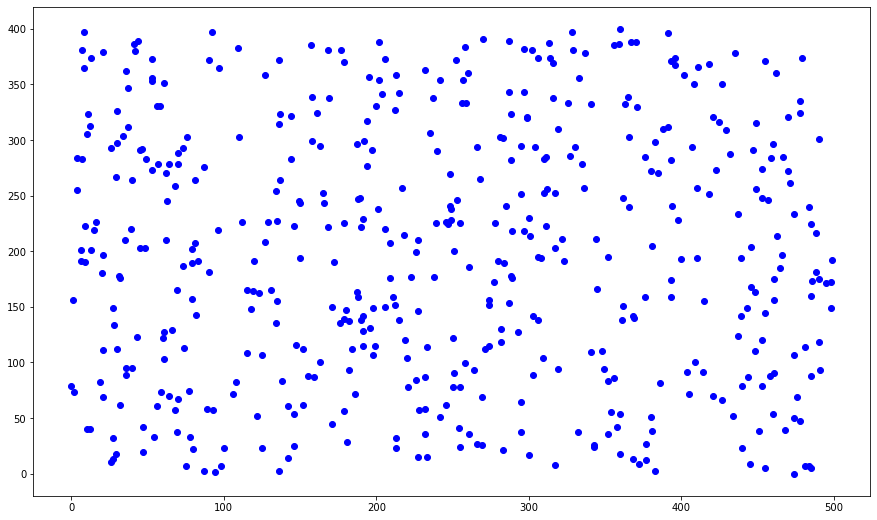

In [41]:
plt.figure(figsize = (15,9))
plt.plot(xpoints, ypoints, "ob")
plt.show()

In [42]:
point = collections.namedtuple("point","x y")
points = [point(e[0],e[1]) for e in points]
def cross(p1, p2, p3):
    return (p2.x - p1.x)*(p3.y - p1.y) - (p2.y - p1.y)*(p3.x - p1.x)

# Computes slope of line between p1 and p2
def slope(p1, p2):
    return 1.0*(p1.y-p2.y)/(p1.x-p2.x) if p1.x != p2.x else float('inf')

# distance of p1 and p2
def dis(p1, p2):
    return ((p1.x-p2.x)**2+(p1.y-p2.y)**2)**0.5

# Find the smallest left point and remove it from points
start = min(points, key=lambda p: (p.x, p.y))
points.pop(points.index(start))

# Sort points so that traversal is from start in a ccw circle.
points_slopes = [(p, slope(p, start)) for p in points]
points_slopes.sort(key=lambda e: e[1])
points = []
i = 0
for j in range(1,len(points_slopes)):
    if points_slopes[j][1] != points_slopes[i][1]:
        if j-i == 1:
            points.append(points_slopes[i])
        else:
            points_cl = sorted(points_slopes[i:j], key=lambda e: dis(start, e[0]))
            points.extend(points_cl)
        i = j
points_cl = sorted(points_slopes[i:], key=lambda e: -dis(start, e[0]))
points.extend(points_cl)
points = [p[0] for p in points]

# Add each point to the convex hull.
# If the last 3 points make a cw turn, the second to last point is wrong. 
ans = [start]
for p in points:
    ans.append(p)
    while len(ans) > 2 and cross(ans[-3], ans[-2], ans[-1]) < 0:
        ans.pop(-2)
convex_hull = [[i.x,i.y] for i in ans]
print(convex_hull)

[[0, 79], [10, 40], [26, 10], [94, 1], [474, 0], [485, 5], [498, 149], [499, 192], [490, 301], [479, 374], [391, 396], [360, 400], [8, 397], [7, 381], [4, 284], [1, 156]]


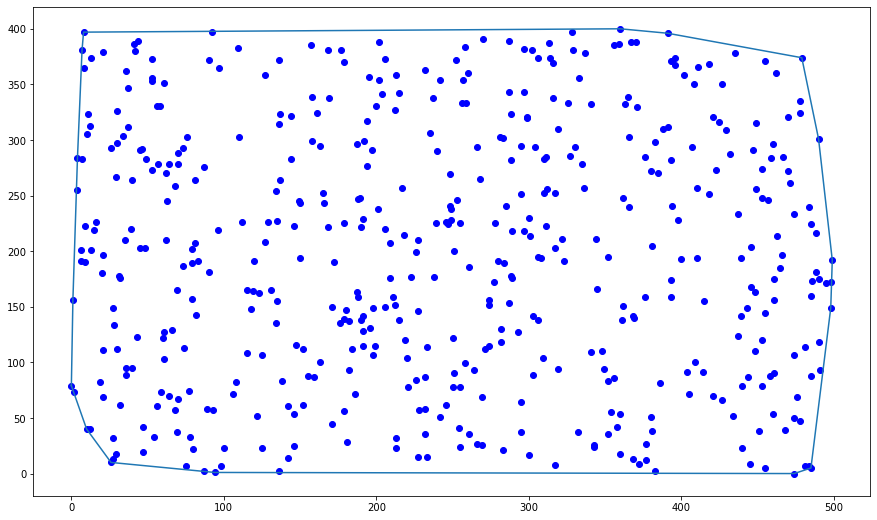

In [43]:
plt.figure(figsize = (15,9))
x_pt = [i[0] for i in convex_hull]
y_pt = [i[1] for i in convex_hull]
x_pt.append(convex_hull[0][0])
y_pt.append(convex_hull[0][1])
plt.plot(xpoints, ypoints, "ob")
plt.plot(x_pt, y_pt)
plt.show()